In [5]:
import nltk
import string
import re

In [6]:
# data preposseing steps
# 1. convert all data to lower case
# 2. remove numbers
# 3. remove punctuation
# 4. remove default stopwords
# 5. stemming
# 6. lemmatization
# 7. part of speech (pos) tagging
# 8. chunking
# 9. Named Entity Recognition
# 10. Text normalization
# 11. Word Count
# 12. Frequency distribution
# 13. n-grams
# 14. Zipf's Law


In [7]:
# 1. convert all data to lower case
# We do lowercase the text to reduce the size of the vocabulary of our text data.
def lowercase_text(text):
    return text.lower()

s = "Weather is too Cloudy. Possiblity of Rain is High, Today!!"
lowercase_text(s)

'weather is too cloudy. possiblity of rain is high, today!!'

In [8]:
# 2. remove numbers
# We should either remove the numbers or convert those numbers into textual representations.
# We use regular expressions(re) to remove the numbers.
def remove_num(text):
    res = re.sub(r"\d+", "", text)
    return res

s = "You bought 6 candies from shop, and 4 candies are in home."
remove_num(s)

'You bought  candies from shop, and  candies are in home.'

In [9]:
# 2. remove numbers
# We use inflect library to convert the numbers into words.
import inflect
inflector = inflect.engine()

def convert_num(text):
    new_text = []
    for word in text.split():
        if word.isdigit():
            new_text.append(inflector.number_to_words(word))
        else:
            new_text.append(word)
    
    return " ".join(new_text)

s = "You bought 6 candies from shop, and 4 candies are in home."
convert_num(s)

'You bought six candies from shop, and four candies are in home.'

In [10]:
# 3. remove punctuation
# We remove punctuations because of that we don't have different form of the same word. 
# If we don't remove punctuations, then been, been, and been! will be treated separately.
def remove_punct(text):
    translator = str.maketrans("", "", string.punctuation)
    return text.translate(translator)

s = "Hey, Are you excited??, After a week, we will be in Shimla!!!"
remove_punct(s)

'Hey Are you excited After a week we will be in Shimla'

In [11]:
# 4. remove default stopwords
# Stopwords are words that do not contribute to the meaning of the sentence. 
# Hence, they can be safely removed without causing any change in the meaning of a sentence. 
# The NLTK(Natural Language Toolkit) library has the set of stopwords and we can use these 
# to remove stopwords from our text and return a list of word tokens.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("stopwords")
nltk.download("punkt")

def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text

s = "Data is the new oil. A.I is the last invention."
remove_stopwords(s)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/calkikhunt/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/calkikhunt/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Data', 'new', 'oil', '.', 'A.I', 'last', 'invention', '.']

In [12]:
# 5. stemming
# From Stemming we will process of getting the root form of a word. 
# Root or Stem is the part to which inflextional affixes(like -ed, -ize, etc) are added. 
# We would create the stem words by removing the prefix of suffix of a word. So, stemming a word may not result in actual words.

# For Example: Mangoes ---> Mango
#             Boys ---> Boy
#             going ---> go
             
# If our sentences are not in tokens, then we need to convert it into tokens. 
# After we converted strings of text into tokens, then we can convert those word tokens into their root form. 
# These are the Porter stemmer, the snowball stemmer, and the Lancaster Stemmer. We usually use Porter stemmer among them.

# The process of reducing a word to its stem or root format.

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

portal_stemmer = PorterStemmer()

def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [portal_stemmer.stem(word) for word in word_tokens]
    return stems

s = 'Data is the new revolution in the World, in a day one individual would generate terabytes of data.'
stem_words(s)

['data',
 'is',
 'the',
 'new',
 'revolut',
 'in',
 'the',
 'world',
 ',',
 'in',
 'a',
 'day',
 'one',
 'individu',
 'would',
 'gener',
 'terabyt',
 'of',
 'data',
 '.']

In [13]:
# 6. lemmatization
# As stemming, lemmatization do the same but the only difference is that lemmatization ensures that 
# root word belongs to the language. Because of the use of lemmatization we will get the valid words. 
# In NLTK(Natural language Toolkit), we use WordLemmatizer to get the lemmas of words. 
# We also need to provide a context for the lemmatization.So, we added pos(parts-of-speech) as a parameter.

# The transformation that uses a dictionary to map a word’s variant back to its root format

from nltk.stem import wordnet
from nltk.tokenize import word_tokenize

lemma = wordnet.WordNetLemmatizer()
nltk.download('wordnet')

def lemmatize_word(text):
    word_token = word_tokenize(text)
    lemmas = [lemma.lemmatize(word, pos="v") for word in word_token]
    return lemmas

s = 'Data is the new revolution in the World, in a day one individual would generate terabytes of data.'
lemmatize_word(s)

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/calkikhunt/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['Data',
 'be',
 'the',
 'new',
 'revolution',
 'in',
 'the',
 'World',
 ',',
 'in',
 'a',
 'day',
 'one',
 'individual',
 'would',
 'generate',
 'terabytes',
 'of',
 'data',
 '.']

In [14]:
# 7. part of speech (pos) tagging
# The pos(parts of speech) explain you how a word is used in a sentence. In the sentence, 
# a word have different contexts and semantic meanings. The basic natural language processing(NLP) models 
# like bag-of-words(bow) fails to identify these relation between the words. For that we use pos tagging 
# to mark a word to its pos tag based on its context in the data. Pos is also used to extract relationship between the words.
from nltk.tokenize import word_tokenize
from nltk import pos_tag

nltk.download("averaged_perceptron_tagger")

def pos_tagg(text):
    word_tokens = word_tokenize(text)
    return pos_tag(word_tokens)

pos_tagg("Are you afraid of something?")

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/calkikhunt/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Are', 'NNP'),
 ('you', 'PRP'),
 ('afraid', 'IN'),
 ('of', 'IN'),
 ('something', 'NN'),
 ('?', '.')]

In [15]:
# 8. chunking
# Chunking is the process of extracting phrases from the Unstructured text and give them more structure to it. 
# We also called them shallow parsing. We can do it on top of pos tagging. It groups words into chunks mainly 
# for noun phrases. chunking we do by using regular expression. 
from nltk.tokenize import word_tokenize
from nltk import pos_tag

def chunking(text, grammer):
    word_tokens = word_tokenize(text)
    word_pos = pos_tag(word_tokens)
    chunkParser = nltk.RegexpParser(grammer)
    tree = chunkParser.parse(word_pos)
    for subtree in tree.subtrees():
        print(subtree)
    tree.draw()

s = "the little red parrot is flying in the sky"
grammar = "NP: {<DT>?<JJ>*<NN>}"
chunking(s, grammar)

# In the above example, we defined the grammar by using the regular expression rule. 
# This rule tells you that NP(noun phrase) chunk should be formed whenever the chunker find the optional determiner(DJ) 
# followed by any no. of adjectives and then a NN(noun).
# Libraries like Spacy and TextBlob are best for chunking.


(S
  (NP the/DT little/JJ red/JJ parrot/NN)
  is/VBZ
  flying/VBG
  in/IN
  (NP the/DT sky/NN))
(NP the/DT little/JJ red/JJ parrot/NN)
(NP the/DT sky/NN)


[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/calkikhunt/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/calkikhunt/nltk_data...
[nltk_data]   Package words is already up-to-date!


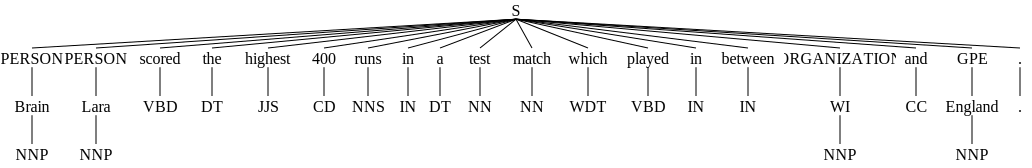

In [16]:
# 9. Named Entity Recognition
# It is used to extract information from unstructured text. It is used to classy the entities which is 
# present in the text into categories like a person, organization, event, places, etc. This will give you 
# a detail knowledge about the text and the relationship between the different entities.
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk

nltk.download("maxent_ne_chunker")
nltk.download("words")

def ner(text):
    word_tokens = word_tokenize(text)
    word_pos = pos_tag(word_tokens)
    return ne_chunk(word_pos)

s = "Brain Lara scored the highest 400 runs in a test match which played in between WI and England."
ner(s)

In [17]:
# 10. Text normalization
# In the text pre-processing highly overlooked step is text normalization. The text normalization means 
# the process of transforming the text into the canonical(or standard) form. Like, "ok" and "k" can be 
# transformed to "okay", its canonical form. And another example is mapping of near identical words such 
# as "preprocessing", "pre-processing" and "pre processing" to just "preprocessing".

# Text normaliztion is too useful for noisy text such as social media comments, comment to blog posts, 
# text messages, where abbreviations, misspellings, and the use out-of-vocabulary(oov) are prevalent.

# Text normalization has even been effective for analyzing highly unstructured clinical texts where physicians 
# take notes in non-standard ways. We have also found it useful for topic extraction where near synonyms and 
# spelling differences are common (like 'topic modelling', 'topic modeling', 'topic-modeling', 'topic-modelling').

# Unlike stemming and lemmatization, there is not a standard way to normalize texts. It typically depends on 
# the task. For e.g, the way you would normalize clinical texts would arguably be different from how you normalize text messages.

# Some of the common approaches to text normalization include dictionary mappings, statistical machine 
# translation (SMT) and spelling-correction based approaches.



In [18]:
# 11. Word Count


In [19]:
from nltk.tokenize.regexp import WhitespaceTokenizer
s = "'There is no need to panic. We need to work together, take small yet important measures to ensure self-protection,' the Prime Minister tweeted."
WhitespaceTokenizer().tokenize(s)

["'There",
 'is',
 'no',
 'need',
 'to',
 'panic.',
 'We',
 'need',
 'to',
 'work',
 'together,',
 'take',
 'small',
 'yet',
 'important',
 'measures',
 'to',
 'ensure',
 "self-protection,'",
 'the',
 'Prime',
 'Minister',
 'tweeted.']

In [20]:
from nltk.tokenize.regexp import WordPunctTokenizer
s = "'There is no need to panic. We need to work together, take small yet important measures to ensure self-protection,' the Prime Minister tweeted."
WordPunctTokenizer().tokenize(s)

["'",
 'There',
 'is',
 'no',
 'need',
 'to',
 'panic',
 '.',
 'We',
 'need',
 'to',
 'work',
 'together',
 ',',
 'take',
 'small',
 'yet',
 'important',
 'measures',
 'to',
 'ensure',
 'self',
 '-',
 'protection',
 ",'",
 'the',
 'Prime',
 'Minister',
 'tweeted',
 '.']

<FreqDist with 23 samples and 28 outcomes>


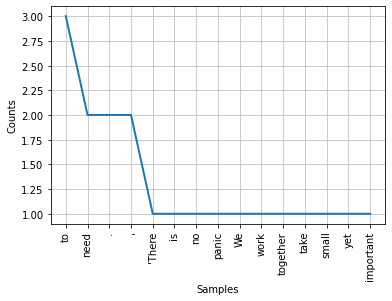

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [21]:
# 12. Frequency distribution
from nltk import FreqDist
from nltk.tokenize import word_tokenize
s = "'There is no need to panic. We need to work together, take small yet important measures to ensure self-protection,' the Prime Minister tweeted."
freqDist = FreqDist(word_tokenize(s))
print(freqDist)
freqDist.plot(15)

In [22]:
# 13. n-grams
from nltk import ngrams
from nltk.tokenize import word_tokenize
s = "Now is better than never."
list(ngrams(word_tokenize(s), 4))

[('Now', 'is', 'better', 'than'),
 ('is', 'better', 'than', 'never'),
 ('better', 'than', 'never', '.')]

### 14. Zipf's Law

Zipf’s Law is a statistical distribution in certain data sets, such as words in a linguistic corpus, in which the frequencies of certain words are inversely proportional to their ranks. Named for linguist George Kingsley Zipf, who around 1935 was the first to draw attention to this phenomenon, the law examines the frequency of words in natural language and how the most common word occurs twice as often as the second most frequent word, three times as often as the subsequent word and so on until the least frequent word. The word in the position n appears 1/n times as often as the most frequent one.

In [23]:
import re
import requests

In [24]:
url = "https://www.gutenberg.org/cache/epub/345/pg345.txt"
content = requests.get(url)
text_string = content.text

In [25]:
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', text_string)
words

['The',
 'Project',
 'Gutenberg',
 'Dracula',
 'Bram',
 'Stoker',
 'This',
 'for',
 'the',
 'use',
 'anyone',
 'anywhere',
 'the',
 'United',
 'States',
 'and',
 'most',
 'other',
 'parts',
 'the',
 'world',
 'cost',
 'and',
 'with',
 'almost',
 'whatsoever',
 'You',
 'may',
 'copy',
 'give',
 'away',
 'use',
 'under',
 'the',
 'terms',
 'the',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'with',
 'this',
 'online',
 'www',
 'gutenberg',
 'org',
 'you',
 'are',
 'not',
 'located',
 'the',
 'United',
 'States',
 'you',
 'will',
 'have',
 'check',
 'the',
 'laws',
 'the',
 'country',
 'where',
 'you',
 'are',
 'located',
 'before',
 'using',
 'this',
 'Title',
 'Dracula',
 'Author',
 'Bram',
 'Stoker',
 'Release',
 'Date',
 'October',
 'Most',
 'recently',
 'updated',
 'July',
 'Language',
 'English',
 'Produced',
 'Chuck',
 'Greif',
 'and',
 'the',
 'Online',
 'Team',
 'Bram',
 'Stoker',
 'colophon',
 'Copyright',
 'the',
 'United',
 'States',
 'America',
 'according',
 'Act',
 '

In [26]:
from collections import Counter
counter = Counter(words)
top_10_frq_words = counter.most_common(10)
top_10_frq_words

[('the', 7483),
 ('and', 5800),
 ('that', 2434),
 ('was', 1869),
 ('for', 1481),
 ('not', 1400),
 ('his', 1384),
 ('with', 1283),
 ('you', 1270),
 ('all', 1118)]

In [27]:
most_frequent = top_10_frq_words[0][1]
for i, j in top_10_frq_words:
    print(i, j, round(most_frequent/j, 2))

the 7483 1.0
and 5800 1.29
that 2434 3.07
was 1869 4.0
for 1481 5.05
not 1400 5.34
his 1384 5.41
with 1283 5.83
you 1270 5.89
all 1118 6.69


### Similarity measure
In statistics and related fields, a similarity measure or similarity function or similarity metric is a real-valued function that quantifies the similarity between two objects.
<br><br>
Levenshtein: The Levenshtein distance is a number that tells you how different two strings are. The higher the number, the more different the two strings are.
<br><br>
Jaccard: Jaccard Similarity defined as an intersection of two documents divided by the union of that two documents that refer to the number of common words over a total number of words.<br>
<img src="Jaccard-Similarity.png" height="400">
<br><br>
Smith Waterman: https://www.youtube.com/watch?v=lu9ScxSejSE&ab_channel=Bioinformatica

https://python.gotrained.com/nltk-edit-distance-jaccard-distance/

In [28]:
# Levenshtein
from nltk.metrics import distance
s1 = "rain"
s2 = "shine"
print(distance.edit_distance(s1, s2))
print(distance.edit_distance_align(s1, s2))

3
[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (4, 5)]


In [29]:
# Jaccard
distance.jaccard_distance(set(s1), set(s2))

0.7142857142857143

In [30]:
# Smith Waterman


### Syntactic analysis
Syntactic analysis is a well-developed area of NLP that deals with the syntax of NL.
